###### Level 3_Tasks_done by pregadesh.u

In [4]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#print("Done")

Done


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [12]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
#print("ok"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Srilekha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srilekha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srilekha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


ok


In [6]:
data = r'Dataset .csv'
esh=pd.read_csv(data)
esh

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


###### TASK1 - identify the most common positive and negative keywords.

In [7]:
rating_texts=esh['Rating text']
rating_texts

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [14]:
sia=SentimentIntensityAnalyzer()

stop_words=set(stopwords.words('english'))

positive=[]
negative=[]
for rating_text in rating_texts:
    tokens= word_tokenize(rating_text.lower())
    tokens=[token for token in tokens if token.isalpha() and token not in stop_words]
    
    sentiment_score=sia.polarity_scores(rating_text)['compound']
    
    if sentiment_score>=0.2:
        positive.extend(tokens)
    elif sentiment_score<=0.2:
        negative.extend(tokens)
positive_counts=Counter(positive)
negative_counts=Counter(negative)

num_top_keywords = 10
print('\nTop positive:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top positive:
good:3179 times
excellent:301 times


In [15]:
print('\nTop Negative keywords:')
for keyword, count in negative_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top Negative keywords:
average:3737 times
rated:2148 times
poor:186 times


In [17]:
df_analyze=esh[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

###### Result - the most common positive and negative keywords

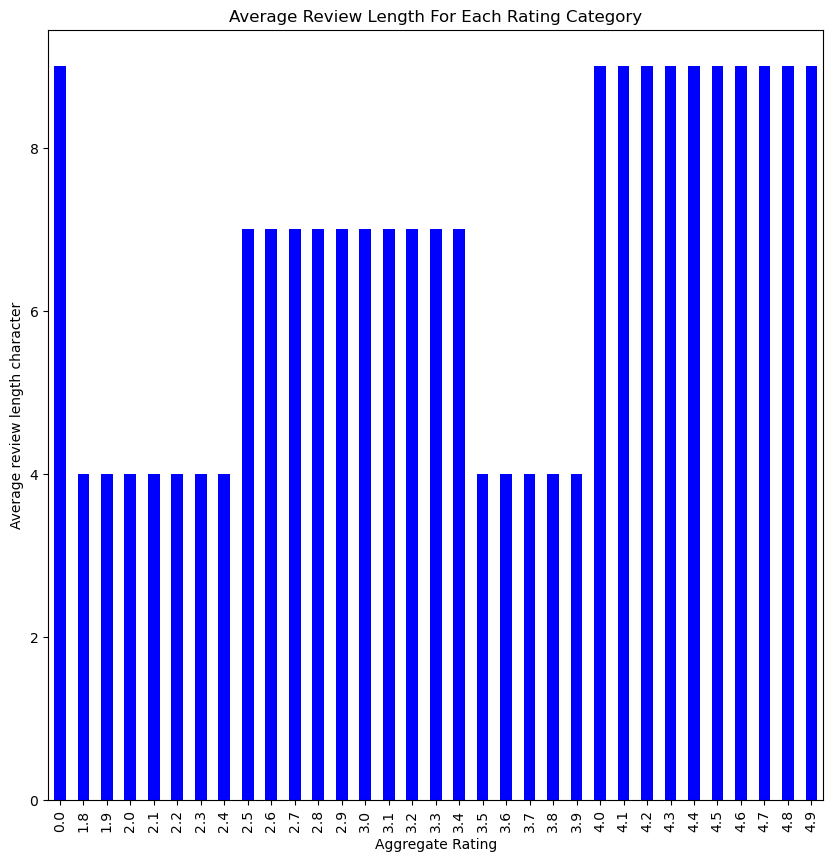

In [18]:
plt.figure(figsize=(10,10))
ave_rev_len.plot(kind='bar',color='blue')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length character')
plt.show()

##### TASK 2 - restaurants with the highest and lowest number of votes

In [19]:
df_votes=esh[['Votes','Restaurant Name']]
df_votes

,Votes,Restaurant Name
0,314,Le Petit Souffle
1,591,Izakaya Kikufuji
2,270,Heat - Edsa Shangri-La
3,365,Ooma
4,229,Sambo Kojin
...,...,...
9546,788,Naml۱ Gurme
9547,1034,Ceviz A��ac۱
9548,661,Huqqa
9549,901,A���k Kahve


In [20]:
print('Restaurant with highest Voyytes:')
max_votes=df_votes.loc[df_votes['Votes'].idxmax()]
max_votes

Restaurant with highest Voyytes:


Votes              10934
Restaurant Name     Toit
Name: 728, dtype: object

In [21]:
print('Resaurant with lowest Votes:')
min_votes=df_votes.loc[df_votes['Votes'].idxmin()]
min_votes

Resaurant with lowest Votes:


Votes                             0
Restaurant Name    Cantinho da Gula
Name: 69, dtype: object

In [22]:
df_analysis = esh[['Votes','Aggregate rating']].copy()
df_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [23]:
corr=df_analysis['Votes'].corr(df_analysis["Aggregate rating"])
corr

0.31369058419541135

##### Result - restaurants with the highest and lowest number of votes

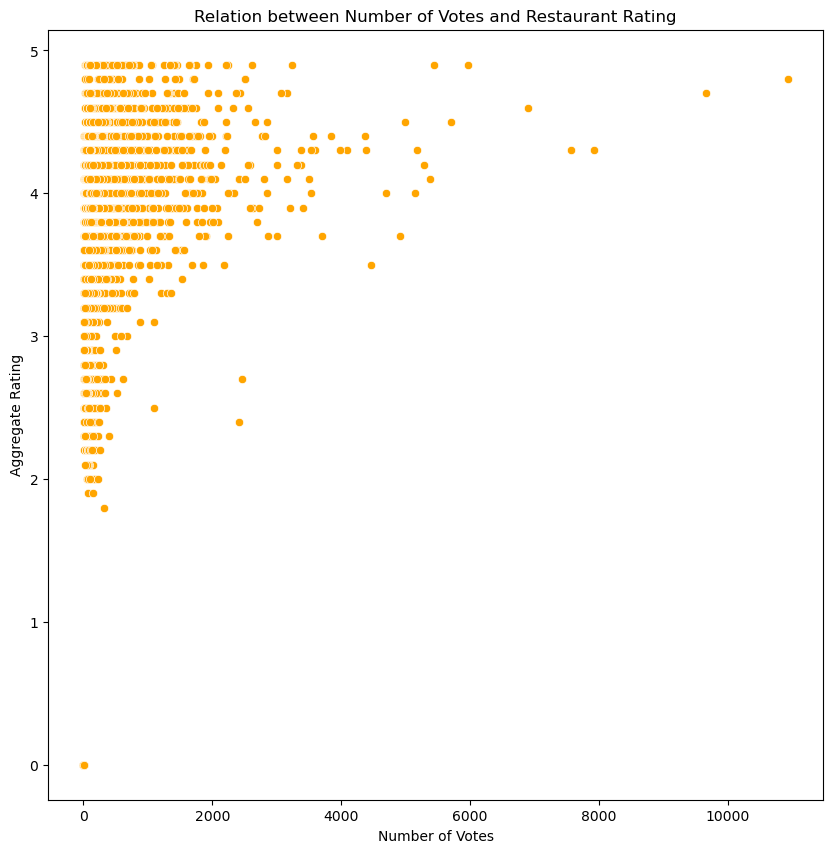

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df_analysis,color='orange')
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

##### TASK 3 - Price Range vs. Online Delivery and Table Booking

In [29]:
esh_analysis=esh[['Price range','Has Online delivery','Has Table booking']].copy()
esh_analysis['Has Online delivery']=esh_analysis['Has Online delivery'].map({'Yes':True,'No':False})
esh_analysis['Has table booking']=esh_analysis['Has Table booking'].map({'Yes':True,'No':False})

In [31]:
summary_table=pd.pivot_table(esh_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)

In [32]:
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


In [33]:
esh

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


<Figure size 1000x800 with 0 Axes>

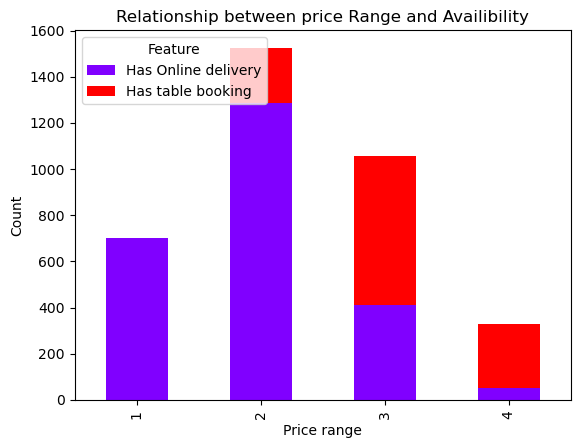

In [34]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='rainbow')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper left')
plt.show()

##### Result - Online Delivery Avalibility by Price Range and Table Booking Availibility by Price range

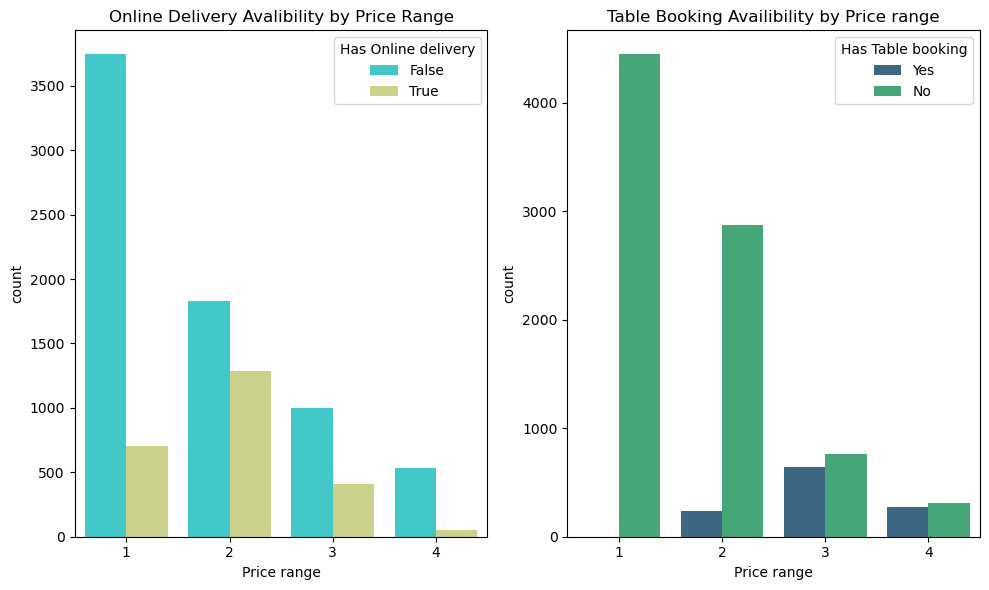

In [36]:
#higher-priced restaurants are more likely to offer these services
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

sns.countplot(x='Price range' , hue='Has Online delivery' , data=esh_analysis,palette='rainbow')
plt.title('Online Delivery Avalibility by Price Range')

plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=esh_analysis,palette='viridis')
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()